# Data Deduplication using Clustering
**Objective**: Learn and implement data deduplication techniques.

**Task**: Deduplication Using K-means Clustering

**Steps**:
1. Data Set: Download a dataset containing duplicate customer records.
2. Preprocess: Standardize the data to ensure better clustering.
3. Apply K-means: Use K-means clustering to find and group similar customer records.
4. Identify Duplicates: Identify and remove duplicates within clusters.

Deduplicated Customer Records:
      Name  Age         City  Cluster
2      Bob   35  Los Angeles        0
4  Charlie   30      Chicago        1
0    Alice   25     New York        2
6    David   40      Houston        3
8      Eve   28        Miami        4


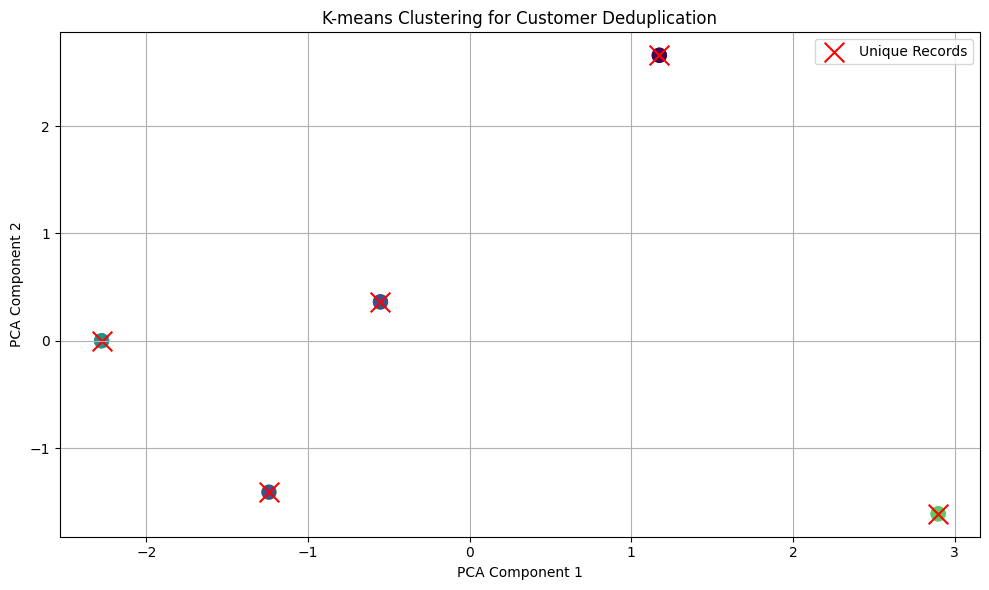

In [1]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# Step 1: Simulate a dataset with duplicate customer records
data = {
    'Name': ['Alice', 'Alicia', 'Bob', 'Robert', 'Charlie', 'Charley', 'David', 'Dave', 'Eve', 'Eva'],
    'Age': [25, 25, 35, 35, 30, 30, 40, 40, 28, 28],
    'City': ['New York', 'New York', 'Los Angeles', 'Los Angeles', 'Chicago', 'Chicago', 'Houston', 'Houston', 'Miami', 'Miami']
}
df = pd.DataFrame(data)

# Convert categorical data to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Name', 'City'])

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Step 3: Apply K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

# Step 4: Identify duplicates within clusters
# Select the closest point in each cluster to represent the "unique" record
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_data)

# Unique records (deduplicated)
unique_records = df.iloc[closest].sort_values(by='Cluster')

print("Deduplicated Customer Records:")
print(unique_records[['Name', 'Age', 'City', 'Cluster']])

# Optional: Visualize Clusters (based on PCA for 2D plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', s=100)
plt.scatter(pca_components[closest, 0], pca_components[closest, 1], c='red', label='Unique Records', s=200, marker='x')
plt.title('K-means Clustering for Customer Deduplication')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
